In [10]:
from math import exp
import numpy as np
from sympy import Symbol, integrate, exp, oo
from scipy import integrate
import matplotlib.pyplot as plt

In [3]:
# function for the trapezoidal rule
def TrapezoidalRule(a,b,f,n):
    h = (b-a)/float(n)
    s = 0
    x = a
    for i in range(1,n,1):
        x = x+h
        s = s+ f(x)
        s = 0.5*(f(a)+f(b)) +s
    return h*s
# function for the Gaussian quadrature with Laguerre polynomials
def GaussLaguerreRule(n):
    s = 0
    xgauleg, wgauleg = np.polynomial.laguerre.laggauss(n)
    for i in range(1,n,1):
        s = s+ xgauleg[i]*xgauleg[i]*wgauleg[i]
    return s
# function to compute
def function(x):
    return x*x*exp(-x)

In [7]:
# Integration limits for the Trapezoidal rule
a = 0.0; b = 10000.0
# define x as a symbol to be used by sympy
x = Symbol("x")
# find result from sympy
exact = integrate(function(x), (x, a, oo))
# set up the arrays for plotting the relative error
n = np.zeros(40); Trapez = np.zeros(4); LagGauss = np.zeros(4);
# find the relative error as function of integration points
for i in range(1, 3, 1):
    npts = 10**i
    n[i] = npts
    Trapez[i] = abs((TrapezoidalRule(a,b,function,npts)-exact)/exact)
    LagGauss[i] = abs((GaussLaguerreRule(npts)-exact)/exact)
print("Integration points=", n[1], n[2])
print("Trapezoidal relative error=", Trapez[1], Trapez[2])
print("LagGuass relative error=", LagGauss[1], LagGauss[2])

Integration points= 10.0 100.0
Trapezoidal relative error= 1.0 1.0
LagGuass relative error= 0.002928191982085049 3.7659283941282595e-06


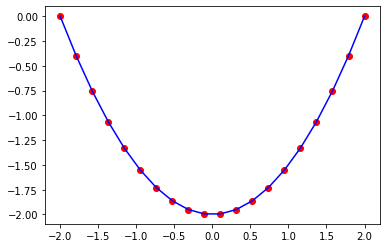

In [13]:
x = np.linspace(-2, 2, num=20)
y = x
y_int = integrate.cumtrapz(y, x, initial=0)
plt.plot(x, y_int, 'ro', x, y[0] + 0.5 * x**2, 'b-')
plt.show()

In [20]:
x = np.linspace(-1, 1, 1000)
y = np.exp((x**2-1.0)**2)
y_int = integrate.cumtrapz(y, x, initial=0)
y_int /= y_int[-1]
y_int2 = np.trapz(y,x)
y_int2 /= y_int2[-1]
plt.plot(x, y_int)
plt.plot(x, y_int2)
plt.show()

IndexError: invalid index to scalar variable.

In [18]:
x = np.linspace(-1, 1, 1000)